### Covid - 19 Analysis & visualization

Coronaviruses are a family of viruses that range from the common cold to MERS coronavirus, which is
Middle East Respiratory Syndrome coronavirus and SARs, Severe acute respiratory syndrome
coronavirus.

Where do coronaviruses come from?
Corona viruses are circulating in animals and some of these coronaviruses have the capability of
transmitting between animals and humans. We call that a spillover event.

How can I help protect myself from a coronavirus?
The coronaviruses typically cause respiratory symptoms. So we recommend basic hand hygiene, such
as washing your hands with soap and water and respiratory hygiene, such as when you sneeze,
sneezing into your elbow.

Ways to protect yourself against a potential animal source would be to avoid unnecessary
unprotected contact with live animals and to make sure that you wash your hands thoroughly after
contact with animals and also to make sure your meat is cooked thoroughly before consuming.

Is there treatment?
There are no specific treatments for coronaviruses, but symptoms can be treated.

In [1]:
! pip install calmap

ERROR: Could not find a version that satisfies the requirement calmap (from versions: none)
ERROR: No matching distribution found for calmap


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import bokeh
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
from bokeh.models import HoverTool

import warnings 
warnings.filterwarnings('ignore')

Loading BokehJS ...

In [3]:
pip install bokeh

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Amit' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
covid = pd.read_csv('covid_clean_complete_data.csv',parse_dates=['Date'])

In [5]:
# color pallette
c = '#393e46' # confirmed - grey
d = '#ff2e63' # death - red
r = '#30e3ca' # recovered - cyan
s = '#f8b400' # still infected - yellow

In [6]:
covid.info()          # dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25152 entries, 0 to 25151
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  7680 non-null   object        
 1   Country/Region  25152 non-null  object        
 2   Lat             25152 non-null  float64       
 3   Long            25152 non-null  float64       
 4   Date            25152 non-null  datetime64[ns]
 5   Confirmed       25152 non-null  int64         
 6   Deaths          25152 non-null  int64         
 7   Recovered       25152 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1.5+ MB


In [7]:
covid.isnull().sum()             # checking for missing value

Province/State    17472
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [8]:
covid.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,25152.000000,25152.000000,25152.000000,25152.000000,25152.000000
mean,21.433571,22.597991,2430.562420,147.948752,607.899531
std,24.740912,70.570899,23545.664313,1561.525918,5210.234488
min,-51.796300,-135.000000,-1.000000,-1.000000,0.000000
25%,7.000000,-19.020800,0.000000,0.000000,0.000000
50%,23.659750,20.921188,6.000000,0.000000,0.000000
75%,41.204400,81.000000,184.000000,2.000000,18.000000
max,71.706900,178.065000,965785.000000,54881.000000,117727.000000


### Preprocessing

In [9]:
# still infected = confirmed - (deaths - recovered)
covid['Actual Confirmed'] =covid['Confirmed']-covid['Deaths']-covid['Recovered'] 

# replacing Mainland china with China
covid['Country/Region']=covid['Country/Region'].replace('Mainland China','China') 

# filling missing values 
num_data =['Confirmed','Deaths','Recovered','Actual Confirmed']
covid[['Province/State']] = covid[['Province/State']].fillna('')
covid[num_data]=covid[num_data].fillna(0)

In [10]:
## create a seprate table for ship
ship = covid[covid['Province/State'].str.lower().str.contains('ship')]

## create a seprate table for china

china= covid[covid['Country/Region']=='China']

## create a seprate table for rest of the world

row = covid[covid['Country/Region']!='China']

In [11]:
#Add month and week
covid['Month']= covid['Date'].dt.month
covid['Week']= covid['Date'].dt.week
covid =covid[['Province/State','Country/Region','Lat','Long','Date','Confirmed','Deaths','Recovered','Actual Confirmed','Month','Week']]
# latest
covid_latest=covid[covid['Date']==max(covid['Date'])].reset_index()
china_latest= covid_latest[covid_latest['Country/Region']=='China']
row_latest= covid_latest[covid_latest['Country/Region']!='China']

#Groupby tabel 
covid_latest_group=covid_latest.groupby('Country/Region')['Confirmed','Deaths','Recovered','Actual Confirmed'].sum().reset_index()
china_latest_group=china_latest.groupby('Province/State')['Confirmed','Deaths','Recovered','Actual Confirmed'].sum().reset_index()
row_latest_group=row_latest.groupby('Country/Region')['Confirmed','Deaths','Recovered','Actual Confirmed'].sum().reset_index()



In [12]:
covid.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Actual Confirmed,Month,Week
0,,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0,1,4
1,,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,1,4
2,,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,1,4
3,,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,1,4
4,,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,1,4


#### Latest Complete Data


In [13]:
covid_group_latest= covid.groupby(['Country/Region','Province/State'])['Confirmed','Deaths','Recovered','Actual Confirmed'].max()
covid_group_latest.style.background_gradient(cmap='Reds')

,,Confirmed,Deaths,Recovered,Actual Confirmed
Country/Region,Province/State,,,,
Afghanistan,,1531,50,207,1274
Albania,,726,28,410,288
Algeria,,3382,425,1508,1449
Andorra,,738,40,344,504
Angola,,26,2,6,18
Antigua and Barbuda,,24,3,11,21
Argentina,,3892,192,1107,2593
Armenia,,1746,28,833,885
Australia,Australian Capital Territory,106,3,99,76


In [14]:
covid_group_latest.head()

,,Confirmed,Deaths,Recovered,Actual Confirmed
Country/Region,Province/State,,,,
Afghanistan,,1531,50,207,1274
Albania,,726,28,410,288
Algeria,,3382,425,1508,1449
Andorra,,738,40,344,504
Angola,,26,2,6,18


#### Latest_Summary_Data

In [15]:
Current_Summary=covid_latest.groupby('Date')['Confirmed','Deaths','Recovered','Actual Confirmed'].sum().reset_index()
Current_Summary=Current_Summary[Current_Summary['Date']==max(Current_Summary['Date'])].reset_index(drop = True)
Current_Summary.style.background_gradient(cmap='Pastel1')

,Date,Confirmed,Deaths,Recovered,Actual Confirmed
0,2020-04-26 00:00:00,2971470,206542,842917,1922011


In [16]:
covid_latest.tail()

,index,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Actual Confirmed,Month,Week
257,25147,Saint Pierre and Miquelon,France,46.885200,-56.315900,2020-04-26,1,0,0,1,4,17
258,25148,,South Sudan,6.877000,31.307000,2020-04-26,6,0,0,6,4,17
259,25149,,Western Sahara,24.215500,-12.885800,2020-04-26,6,0,5,1,4,17
260,25150,,Sao Tome and Principe,0.186360,6.613081,2020-04-26,4,0,0,4,4,17
261,25151,,Yemen,15.552727,48.516388,2020-04-26,1,0,0,1,4,17


### Country wise Data


In [17]:
country_sum= covid_latest_group.sort_values(by='Confirmed', ascending=False)
country_sum = country_sum.reset_index(drop=True)
country_sum.style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered,Actual Confirmed
0,US,965785,54881,106988,803916
1,Spain,226629,23190,117727,85712
2,Italy,197675,26644,64928,106103
3,France,162220,22890,45681,93649
4,Germany,157770,5976,112000,39794
5,United Kingdom,154037,20794,778,132465
6,Turkey,110130,2805,29140,78185
7,Iran,90481,5710,69657,15114
8,China,83912,4637,75718,3557
9,Russia,80949,747,6767,73435


**Countries with deaths reported**


In [18]:
country_death=country_sum[country_sum['Deaths']>0][['Country/Region','Deaths']]
country_death.sort_values('Deaths',ascending = False).reset_index(drop=True).style.background_gradient(cmap='Reds')

,Country/Region,Deaths
0,US,54881
1,Italy,26644
2,Spain,23190
3,France,22890
4,United Kingdom,20794
5,Belgium,7094
6,Germany,5976
7,Iran,5710
8,China,4637
9,Netherlands,4491


**Countries with no cases recovered**


In [19]:
country_no_recovered= country_sum[country_sum['Recovered']==0][['Country/Region','Confirmed','Deaths','Recovered']]
country_no_recovered.reset_index(drop = True).style.background_gradient(cmap = 'Reds')

,Country/Region,Confirmed,Deaths,Recovered
0,Canada,47145,2661,0
1,Czechia,7404,220,0
2,Cameroon,1621,56,0
3,Mozambique,76,0,0
4,Syria,43,3,0
5,Timor-Leste,24,0,0
6,Botswana,22,1,0
7,Laos,19,0,0
8,Grenada,18,0,0
9,MS Zaandam,9,2,0


#### Countries with all cases died


In [20]:
Country_allcases_died= row_latest_group[row_latest_group['Confirmed']==
                                        row_latest_group['Deaths']] 
Country_allcases_died= Country_allcases_died[['Country/Region','Confirmed','Deaths']].sort_values('Confirmed',                 
                                    ascending =False)
Country_allcases_died.reset_index(drop = True)
Country_allcases_died.style.background_gradient(cmap ='Red')


,Country/Region,Confirmed,Deaths


#### Countries with all the cases recovered¶


In [21]:
country_recovered = row_latest_group[row_latest_group['Confirmed']==
                                     row_latest_group['Recovered']]
country_recovered = country_recovered[['Country/Region','Confirmed','Recovered']]
country_recovered = country_recovered.sort_values('Confirmed', ascending = False)
country_recovered = country_recovered.reset_index(drop = True)
country_recovered.style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Recovered
0,Saint Lucia,15,15


#### Countries with no affected case anymore

In [22]:
country_no_effected = row_latest_group[row_latest_group['Confirmed']==
                                row_latest_group['Deaths']+
                                row_latest_group['Recovered']]
country_no_effected = country_no_effected[['Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
country_no_effected = country_no_effected.sort_values('Confirmed', ascending = False)
country_no_effected.reset_index(drop = True)
country_no_effected.style.background_gradient(cmap ='Reds')

,Country/Region,Confirmed,Deaths,Recovered
139,Saint Lucia,15,0,15
107,Mauritania,7,1,6


#### Chinese province wise data

**In each provinces**


In [23]:
china_data = china_latest_group[['Province/State', 'Confirmed', 'Deaths', 'Recovered','Actual Confirmed']]
china_data = china_data.sort_values(by='Confirmed' , 
                                    ascending = False)
china_data = china_data.reset_index(drop = True)  
china_data.style.background_gradient(cmap = 'Pastel1_r')

,Province/State,Confirmed,Deaths,Recovered,Actual Confirmed
0,Hubei,68128,4512,63616,0
1,Guangdong,1587,8,1542,37
2,Henan,1276,22,0,1254
3,Zhejiang,1268,1,1258,9
4,Hong Kong,1037,4,772,261
5,Hunan,1019,4,1015,0
6,Anhui,991,6,985,0
7,Jiangxi,937,1,936,0
8,Heilongjiang,936,13,0,923
9,Shandong,787,7,768,12


**Provinces with no cases recovered**


In [24]:
china_nocase_recovered = china_latest_group[china_latest_group['Recovered']==0]
china_nocase_recovered = china_nocase_recovered[['Province/State', 'Confirmed', 'Deaths', 'Recovered','Actual Confirmed']]
china_nocase_recovered = china_nocase_recovered.sort_values('Confirmed',
                                                            ascending = False)
china_nocase_recovered = china_nocase_recovered.reset_index(drop = True)
china_nocase_recovered

,Province/State,Confirmed,Deaths,Recovered,Actual Confirmed
0,Henan,1276,22,0,1254
1,Heilongjiang,936,13,0,923
2,Shanghai,642,7,0,635
3,Yunnan,185,2,0,183


**Provinces with all cases died**


In [25]:
china_allcases_died = china_latest_group[china_latest_group['Confirmed']==
                                         china_latest_group['Deaths']]
china_allcases_died = china_allcases_died[['Province/State', 'Confirmed', 'Deaths', 'Recovered']]
china_allcases_died = china_allcases_died.sort_values('Confirmed', 
                                                      ascending = False)
china_allcases_died = china_allcases_died.reset_index(drop = True)
china_allcases_died

,Province/State,Confirmed,Deaths,Recovered


**Provinces with all the cases recovered**


In [26]:
china_allcases_recovered = china_latest_group[china_latest_group['Confirmed']==
                                              china_latest_group['Recovered']]
china_allcases_recovered = china_allcases_recovered[['Province/State', 'Confirmed', 'Recovered']].set_index('Province/State')
china_allcases_recovered = china_allcases_recovered.sort_values('Confirmed', 
                                                                ascending = False).style.background_gradient(cmap = "Reds")
china_allcases_recovered

,Confirmed,Recovered
Province/State,,
Ningxia,75,75
Qinghai,18,18
Tibet,1,1


**Provinces with no affected cases anymore**


In [27]:
china_no_effected = china_latest_group[china_latest_group['Confirmed']==china_latest_group['Deaths']+
                                       china_latest_group['Recovered']]
china_no_effected = china_no_effected[['Province/State', 'Confirmed','Deaths', 'Recovered']].set_index('Province/State')
china_no_effected = china_no_effected.sort_values('Confirmed', ascending = False)
china_no_effected.style.background_gradient(cmap ='Reds')

,Confirmed,Deaths,Recovered
Province/State,,,
Hubei,68128,4512,63616
Hunan,1019,4,1015
Anhui,991,6,985
Jiangxi,937,1,936
Chongqing,579,6,573
Sichuan,561,3,558
Guangxi,254,2,252
Hainan,168,6,162
Guizhou,147,2,145


In [28]:
covid.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Actual Confirmed,Month,Week
0,,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0,1,4
1,,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,1,4
2,,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,1,4
3,,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,1,4
4,,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,1,4


In [29]:
temp = covid_latest.groupby('Date')['Recovered', 'Deaths', 'Actual Confirmed'].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Actual Confirmed'],
                 var_name='Case', value_name='Count')
temp.head()

,Date,Case,Count
0,2020-04-26,Recovered,842917
1,2020-04-26,Deaths,206542
2,2020-04-26,Actual Confirmed,1922011


In [30]:
covid['Month'] = covid['Month'].replace(1,'Jan 20')
covid['Month'] = covid['Month'].replace(2,'Feb 20')
covid['Month'] = covid['Month'].replace(3,'Mar 20')
covid['Month'] = covid['Month'].replace(4,'Apr 20')

covid_Jan = covid[covid['Month']=='Jan 20']
covid_Feb = covid[covid['Month']=='Feb 20']
covid_Mar = covid[covid['Month']=='Mar 20']
covid_Apr = covid[covid['Month']=='Apr 20']

In [31]:
Date_wise=covid.groupby('Date')['Confirmed','Deaths','Recovered','Actual Confirmed'].sum().reset_index()
Date_wise.head()

,Date,Confirmed,Deaths,Recovered,Actual Confirmed
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,35,880
3,2020-01-25,1434,42,38,1354
4,2020-01-26,2118,56,51,2011


In [32]:
Week_wise=covid.groupby('Week')['Confirmed','Deaths','Recovered','Actual Confirmed'].sum().reset_index()
Week_wise

,Week,Confirmed,Deaths,Recovered,Actual Confirmed
0,4,5702,159,182,5361
1,5,61657,1351,1340,58966
2,6,213863,4547,11150,198166
3,7,401800,9574,45147,347079
4,8,534579,15422,118691,400466
5,9,582593,19730,223572,339291
6,10,693621,23667,359033,310921
7,11,955197,35248,465809,454140
8,12,1749735,72554,588674,1088507
9,13,3767640,172056,844388,2751196


In [33]:
Month_wise=covid.groupby('Month')['Confirmed','Deaths','Recovered','Actual Confirmed'].sum().reset_index()
Month_wise = Month_wise.sort_values('Month', ascending=False)
Month_wise

,Month,Confirmed,Deaths,Recovered,Actual Confirmed
3,Mar 20,8894438,386211,2634620,5873607
2,Jan 20,38534,889,808,36837
1,Feb 20,1673291,46898,358557,1267836
0,Apr 20,50527243,3287209,12295904,34944130


In [34]:
from bokeh.models.annotations import Title


**Relation between Actual Confirmed vs Deaths month of Jan'20**

In [35]:
p = figure(height = 300, width = 600)
p.triangle(x = covid_Jan['Actual Confirmed'], y = covid_Jan['Deaths'],color ='red',line_width=2)     
p.xaxis.axis_label = "Number of Cases Confirmed"
p.yaxis.axis_label = "Number of Cases Deaths"
p.title.text='Month Of Jan 20'
p.add_tools(HoverTool())
show(p)

**Relation between Actual Confirmed vs Deaths month of Mar'20**

In [36]:
p = figure(height = 300, width = 600)
p.triangle(x = covid_Feb['Actual Confirmed'], y = covid_Feb['Deaths'],color ='red',line_width=2)     
p.xaxis.axis_label = "Number of Cases Confirmed"
p.yaxis.axis_label = "Number of Cases Deaths"
p.title.text='Month Of Feb 20'
p.add_tools(HoverTool())
show(p)

**Relation between Actual Confirmed vs Deaths month of Mar'20**

In [37]:
p = figure(height = 300, width = 600)
p.triangle(x = covid_Mar['Actual Confirmed'], y = covid_Mar['Deaths'],color ='red',line_width=3)     
p.xaxis.axis_label = "Number of Cases Confirmed"
p.yaxis.axis_label = "Number of Cases Deaths"
p.title.text='Month Of Mar 20'
p.add_tools(HoverTool())
show(p)

**Relation between Actual Confirmed vs Deaths month of Apr'20**

In [38]:
p = figure(height = 300, width = 600)
p.triangle(x = covid_Apr['Actual Confirmed'], y = covid_Apr['Deaths'],color ='red',line_width=2)     
p.xaxis.axis_label = "Number of Cases Confirmed"
p.yaxis.axis_label = "Number of Cases Deaths"
p.title.text='Month Of Apr 20'
p.add_tools(HoverTool())
show(p)

**Correlation**

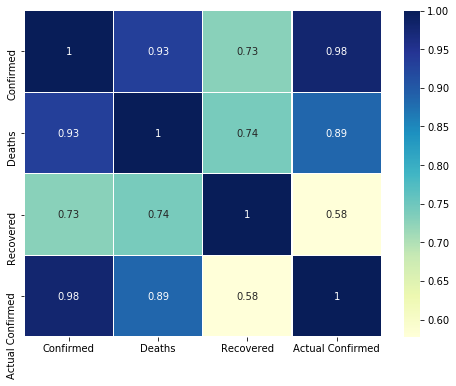

In [39]:
plt.figure(figsize=(8,6))
corre_data = covid_latest.iloc[:,5:10]
corr= corre_data.corr()
sns.heatmap(corr,annot =True,cmap="YlGnBu",linewidths =0.2)

**Monthwise Actual Confirmed case**

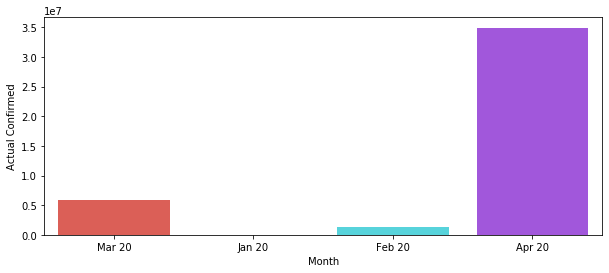

In [40]:
plt.figure(figsize=(10,4))
sns.barplot(x = 'Month', y = 'Actual Confirmed', data = Month_wise,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )
plt.show()

**Weekly Actual Confirmed case**

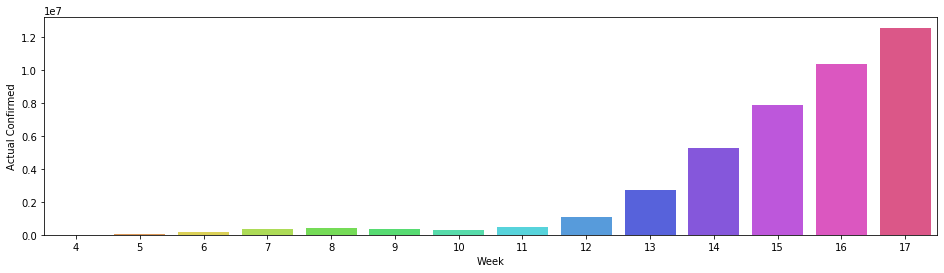

In [41]:
plt.figure(figsize=(16,4))
sns.barplot(x = 'Week', y = 'Actual Confirmed', data = Week_wise,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )
plt.show()

Thanku !!!

Please let me know if is there you found something wrong please let me correct.